In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
np.expand_dims??

In [2]:
df=pd.read_csv('C:\Machine learning\Projects/toxic.csv')

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [5]:
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

In [6]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


# Data Preprocessing

In [7]:
from tensorflow.keras.layers import TextVectorization

In [8]:
X=df['comment_text']
Y=df[df.columns[2:]].values

In [9]:
MAX_FEATURES=200000

In [10]:
vectorizer=TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length=1800,output_mode='int')

In [11]:
vectorizer.adapt(X.values)

In [12]:
type(X.values)

numpy.ndarray

In [13]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [14]:
vectorized_text=vectorizer(X.values)

In [15]:
len(X)

159571

In [16]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32441,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [17]:
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,Y))

In [18]:
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [19]:
batch_X,batch_Y=dataset.as_numpy_iterator().next()

In [20]:
batch_X.shape
batch_Y.shape

(16, 6)

In [21]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [22]:
len(val)

1994

In [23]:
train.as_numpy_iterator().next()

(array([[41313,  1958,     4, ...,     0,     0,     0],
        [   35, 11208, 23592, ...,     0,     0,     0],
        [    8,    67,   253, ...,     0,     0,     0],
        ...,
        [   41,     9,    49, ...,     0,     0,     0],
        [  629,   563,  1612, ...,     0,     0,     0],
        [    8,  1678,     8, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

# CREATING DEEP LEARNING MODEL

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

In [25]:
model = Sequential()

In [26]:
model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='sigmoid'))

In [27]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [29]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 33030s 5s/step - loss: 0.0620 - val_loss: 0.0470


In [30]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

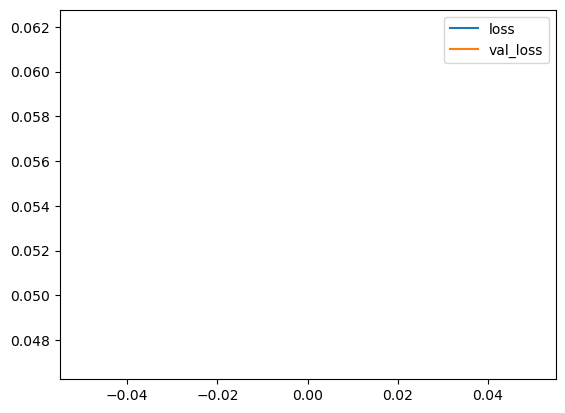

In [31]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Make Predictions

In [32]:
input_text = vectorizer('You freaking suck! I am going to hit you.')


In [35]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [36]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 3s 3s/step


array([[0.9884515 , 0.25116816, 0.91241246, 0.05888509, 0.76774025,
        0.22470789]], dtype=float32)

In [39]:
model.predict(np.array([input_text]))

1/1 [==============================] - 0s 155ms/step


array([[0.9884515 , 0.25116816, 0.91241246, 0.05888509, 0.76774025,
        0.22470789]], dtype=float32)

In [40]:
batch_X,batch_Y=test.as_numpy_iterator().next()

In [43]:
model.predict(batch_X)

1/1 [==============================] - 2s 2s/step


array([[3.15747131e-03, 2.53534580e-08, 1.49517946e-05, 5.72778333e-07,
        4.61140662e-05, 1.92632488e-05],
       [2.40836642e-03, 1.62654104e-08, 1.15248258e-05, 3.81921467e-07,
        3.26094632e-05, 1.56854639e-05],
       [1.42296478e-02, 1.03692082e-06, 1.64124576e-04, 1.33707554e-05,
        4.69149818e-04, 1.74713510e-04],
       [6.58158632e-03, 2.19425360e-07, 6.19187995e-05, 3.40125371e-06,
        1.60237818e-04, 7.42136108e-05],
       [1.39269084e-02, 1.07336200e-06, 1.69311432e-04, 1.30724775e-05,
        4.57975286e-04, 1.87595913e-04],
       [5.59161603e-03, 1.09024562e-07, 3.87733126e-05, 1.91943309e-06,
        1.12566158e-04, 4.71666317e-05],
       [1.87125858e-02, 2.55111445e-06, 2.90521246e-04, 2.70676501e-05,
        7.56427471e-04, 3.09850671e-04],
       [2.00520945e-03, 8.97541952e-09, 7.80403207e-06, 2.37492173e-07,
        2.37200293e-05, 1.06717798e-05],
       [4.10854779e-02, 2.28942536e-05, 1.23924762e-03, 1.59772331e-04,
        2.76269275e-03, 

In [44]:
model.predict(batch_X)>0.5

1/1 [==============================] - 0s 235ms/step


array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [45]:
model.predict(batch_Y)>0.5

1/1 [==============================] - 2s 2s/step


array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [48]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 220ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [49]:
res=model.predict(np.array([input_text]))

1/1 [==============================] - 0s 176ms/step


In [53]:
(res>0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [54]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [55]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [56]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 287ms/step


In [57]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8695651888847351, Recall:0.6084070801734924, Accuracy:0.47241726517677307


In [59]:
import tensorflow as tf
import gradio as gr

In [60]:
model.save('toxicity.h5')

In [61]:
model = tf.keras.models.load_model('toxicity.h5')

In [62]:
input_str = vectorizer('hey i freaken hate you!')

In [63]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 3s 3s/step


In [64]:
res

array([[0.524146  , 0.01724852, 0.11818212, 0.03271543, 0.19662811,
        0.07251695]], dtype=float32)

In [65]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [66]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Users\HP\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\gradio\inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\HP\anaconda3\lib\site-packages\gradio\inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(


In [67]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://4cbbbc236f0fb802b9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 183ms/step
